In [174]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, timedelta, timezone
%matplotlib inline

In [204]:
# Loading Data
df_noshow = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df_noshow.tail(50)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110477,2.798494e+13,5673472,F,2016-05-09T09:24:09Z,2016-06-06T00:00:00Z,67,RESISTÊNCIA,0,0,1,0,0,1,No
110478,5.478497e+12,5671780,F,2016-05-09T07:11:08Z,2016-06-06T00:00:00Z,27,RESISTÊNCIA,0,0,0,0,0,1,No
110479,4.455244e+12,5638153,F,2016-04-29T07:45:43Z,2016-06-06T00:00:00Z,34,RESISTÊNCIA,1,0,0,0,0,1,Yes
110480,3.492935e+11,5606687,F,2016-04-20T10:33:54Z,2016-06-06T00:00:00Z,51,RESISTÊNCIA,0,0,0,0,0,1,No
110481,4.383634e+11,5685319,F,2016-05-11T10:08:44Z,2016-06-06T00:00:00Z,28,RESISTÊNCIA,0,0,0,0,0,1,No
110482,5.944225e+14,5639147,F,2016-04-29T08:45:44Z,2016-06-06T00:00:00Z,43,RESISTÊNCIA,1,0,0,0,0,1,Yes
110483,1.642781e+12,5769404,F,2016-06-03T08:47:58Z,2016-06-03T00:00:00Z,60,PRAIA DO CANTO,0,1,0,0,0,0,No
110484,5.133650e+14,5772155,F,2016-06-03T14:43:56Z,2016-06-07T00:00:00Z,45,BARRO VERMELHO,0,0,0,0,0,0,Yes
110485,4.865334e+12,5762486,F,2016-06-02T07:49:14Z,2016-06-06T00:00:00Z,34,SANTA LUÍZA,0,0,0,0,0,0,No
110486,3.184153e+14,5788099,F,2016-06-08T11:14:23Z,2016-06-08T00:00:00Z,60,MARIA ORTIZ,0,0,0,0,0,0,No


In [176]:
# Checking whether the columns meet the datatype
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [190]:
# Changing columns data type into a more suitable one
df_noshow["ScheduledDay"] = pd.to_datetime(df_noshow["ScheduledDay"]).dt.tz_localize(None)
df_noshow["AppointmentDay"] = pd.to_datetime(df_noshow["AppointmentDay"]).dt.tz_localize(None)
df_noshow["ScheduledDate"] = df_noshow["ScheduledDay"].dt.date
df_noshow["ScheduledDate"] = pd.to_datetime(df_noshow["ScheduledDate"]).dt.tz_localize(None)
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
 14  ScheduledDate   110527 non-null  dat

In [191]:
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29


In [192]:
# Checking Data details
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [193]:
# Discarding Negative values for age
df_noshow_clnd = df_noshow.loc[df_noshow['Age']> 0]
df_noshow_clnd.reset_index(drop = True, inplace = True)

In [194]:
# Checking for duplicated values

df_noshow_clnd.loc[df_noshow_clnd.duplicated() == True]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate


In [195]:
df_noshow_clnd["days_between"] = (df_noshow_clnd['ScheduledDay'] - df_noshow_clnd['AppointmentDay']).dt.days
df_noshow_clnd

c:\users\a041742\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,days_between
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,-35
106983,3.596266e+12,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,-35
106984,1.557663e+13,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,-41
106985,9.213493e+13,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,-41


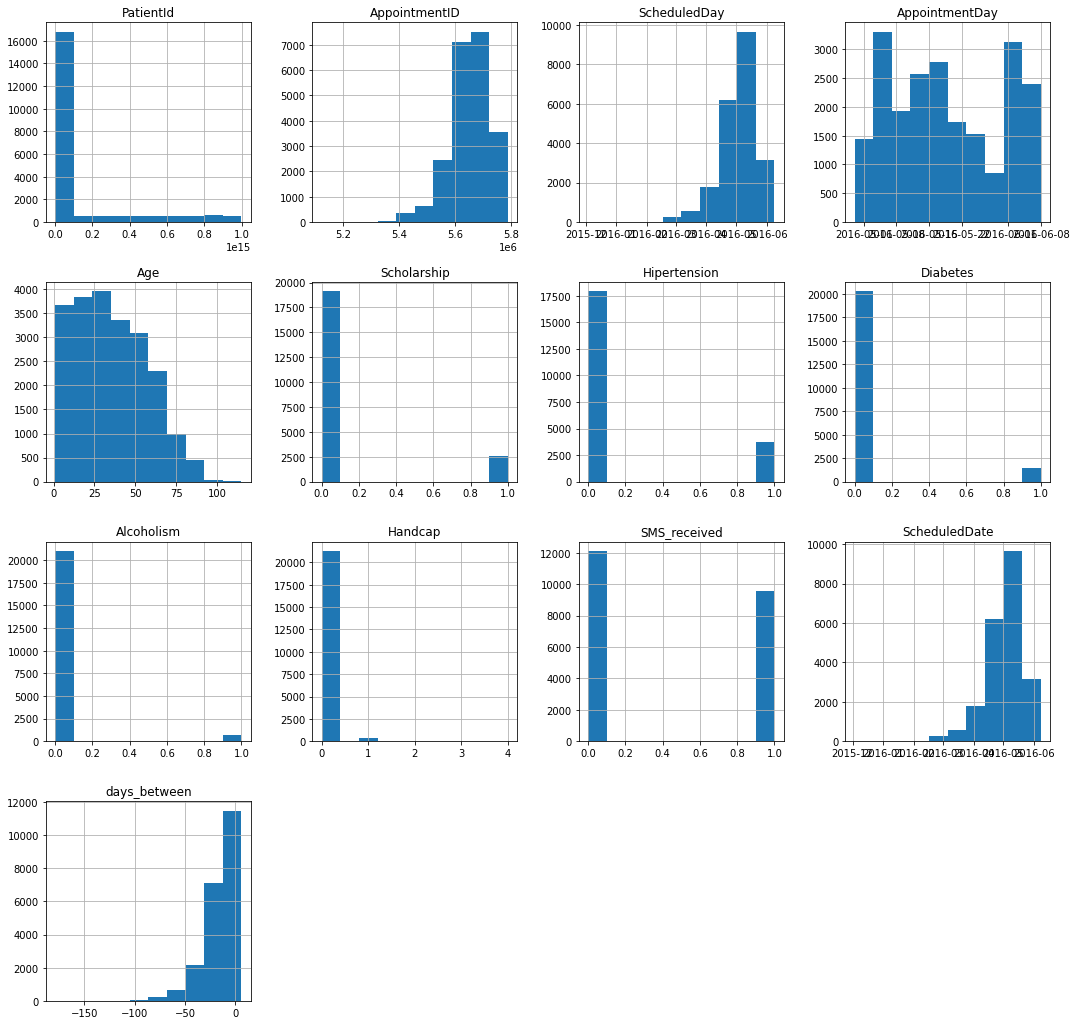

In [196]:
df_missed = df_noshow_clnd.loc[df_noshow_clnd['No-show'] == 'Yes'].reset_index(drop = True)
df_missed.hist(figsize = (18,18));

In [200]:
df_noshow_clnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       106987 non-null  float64       
 1   AppointmentID   106987 non-null  int64         
 2   Gender          106987 non-null  object        
 3   ScheduledDay    106987 non-null  datetime64[ns]
 4   AppointmentDay  106987 non-null  datetime64[ns]
 5   Age             106987 non-null  int64         
 6   Neighbourhood   106987 non-null  object        
 7   Scholarship     106987 non-null  int64         
 8   Hipertension    106987 non-null  int64         
 9   Diabetes        106987 non-null  int64         
 10  Alcoholism      106987 non-null  int64         
 11  Handcap         106987 non-null  int64         
 12  SMS_received    106987 non-null  int64         
 13  No-show         106987 non-null  object        
 14  ScheduledDate   106987 non-null  dat

In [207]:
df_noshow_clnd["days_between"] = (df_noshow_clnd['AppointmentDay'] - df_noshow_clnd['ScheduledDate']).dt.days
df_noshow_clnd.tail(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,days_between
106967,8.973883e+11,5758779,M,2016-06-01 11:09:20,2016-06-01,5,MARIA ORTIZ,0,0,0,0,0,0,No,2016-06-01,0
106968,9.433654e+13,5757656,F,2016-06-01 09:41:00,2016-06-01,59,MARIA ORTIZ,0,0,0,0,0,0,No,2016-06-01,0
106969,4.952968e+14,5786750,M,2016-06-08 08:50:51,2016-06-08,33,MARIA ORTIZ,0,0,0,0,0,0,No,2016-06-08,0
106970,2.362182e+13,5757587,F,2016-06-01 09:35:48,2016-06-01,64,SOLON BORGES,0,0,0,0,0,0,No,2016-06-01,0
106971,8.235996e+11,5786742,F,2016-06-08 08:50:20,2016-06-08,14,MARIA ORTIZ,0,0,0,0,0,0,No,2016-06-08,0
106972,9.876246e+13,5786368,F,2016-06-08 08:20:01,2016-06-08,41,MARIA ORTIZ,0,0,0,0,0,0,No,2016-06-08,0
106973,8.674778e+13,5785964,M,2016-06-08 07:52:55,2016-06-08,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No,2016-06-08,0
106974,2.695685e+12,5786567,F,2016-06-08 08:35:31,2016-06-08,58,MARIA ORTIZ,0,0,0,0,0,0,No,2016-06-08,0
106975,6.456342e+14,5778621,M,2016-06-06 15:58:05,2016-06-08,33,MARIA ORTIZ,0,1,0,0,0,0,Yes,2016-06-06,2
106976,6.923772e+13,5780205,F,2016-06-07 07:45:16,2016-06-08,37,MARIA ORTIZ,0,0,0,0,0,0,Yes,2016-06-07,1
